In [2]:

import numpy as np

In [3]:
from scipy import ndimage
import pydicom
from matplotlib import pyplot as plt

In [4]:
import os
%load_ext autoreload
%autoreload 2
import pandas as pd

In [52]:
history50 = pd.read_csv("logs/20190607x162315TR/history.csv",index_col=0)
history200 = pd.read_csv("logs/20190608x085129TR/history.csv",index_col=0)
history_nr = pd.read_csv("logs/20190608x152317TR/history.csv",index_col=0)
history_lv2 = pd.read_csv("logs/20190608x195228TR/history.csv",index_col=0)

In [82]:
def downsample(image, size=(16,16)):
    zoom = [target / source for target, source in zip(size, image.shape) ]
    image = ndimage.zoom(image,zoom=zoom)
    return image

In [59]:
def plot_history(history):
    for col in [col for col in history.columns if "loss" not in col]:
        plt.plot(history[col],label=col)
    plt.legend()
    plt.savefig("logs/20190608x152317TR/stats.pdf")

In [23]:
plt.savefig("logs/20190608x085129TR/stats.png")

Index(['loss', 'mean_absolute_error', 'dice_coef', 'val_loss',
       'val_mean_absolute_error', 'val_dice_coef'],
      dtype='object')

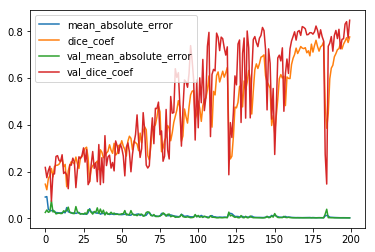

In [60]:
plt  = plot_history(history_nr)


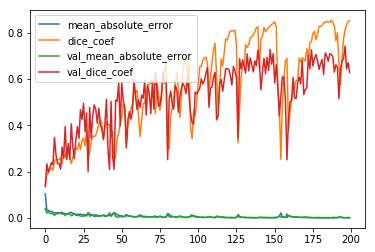

In [56]:
plt = plot_history(history200)
plt.savefig("logs/20190608x085129TR/stats.pdf")

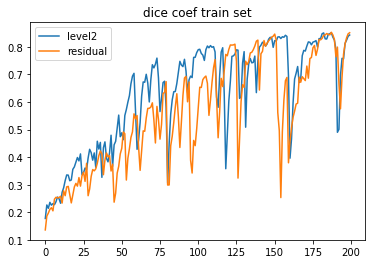

In [55]:
plt.title("dice coef train set")
plt.plot(history_lv2["dice_coef"],label="level2")
plt.plot(history200["dice_coef"],label="residual")
plt.legend()

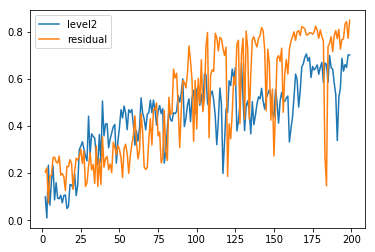

In [57]:
plt.plot(history_lv2["val_dice_coef"][2:],label="level2")
plt.plot(history_nr["val_dice_coef"][2:],label="residual")
plt.legend()

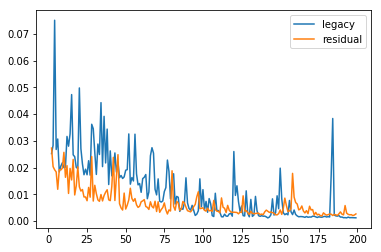

In [54]:
plt.plot(history_nr["val_mean_absolute_error"][2:],label="legacy")
plt.plot(history200["val_mean_absolute_error"][2:],label="residual")
plt.legend()

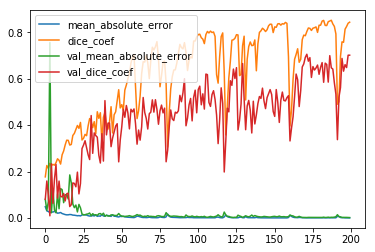

In [53]:
plt = plot_history(history_lv2)
plt.savefig("logs/20190608x195228TR/stats.pdf")

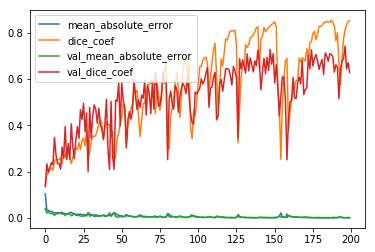

In [46]:
plt = plot_history(history200)

In [49]:
file = pydicom.read_file(ad.paths_mask[2])

In [41]:
histo = list()
for path in ad.paths_mask:
    file = pydicom.read_file(path)
    histo.append(np.extract(file.pixel_array != 0.0, file.pixel_array))


In [14]:
ad = preprocessing.AneurysmData(config.PATH, size=None)


AttributeError: module 'config' has no attribute 'PATH'

In [15]:
ad.save_all(config.full_data_path)

True

In [92]:
def show_image(aneurysmData, N=4):
    image = ad.images[0]
    mask = ad.masks[0]
    plt.figure(dpi=800)
    plt.rcParams['figure.figsize'] = [20,20]
    fig, ax = plt.subplots(nrows=N, ncols=N)
    for i in range(N):
        for j in range(N):
            im = image[i+j*N,:,:]
            m = mask[i+j*N,:,:]
            ax[i,j].imshow(im,alpha=0.2,cmap="Greys_r")
            ax[i,j].imshow(m==0,alpha=0.8, cmap="cividis",vmin=0,vmax=1)
    return fig

In [22]:
np.array(ad.images).shape

(100, 40, 40, 40)

In [4]:
from data import patching
import numpy as np

In [15]:
arr = np.eye(10,10)
np.lib.stride_tricks.as_strided(arr,shape=(8,3,3),strides=(1,1,1))

array([[[1.00000000e+000, 1.77658241e-307, 3.47328271e-310],
        [1.77658241e-307, 3.47328271e-310, 1.35675106e-312],
        [3.47328271e-310, 1.35675106e-312, 5.29980882e-315]],

       [[1.77658241e-307, 3.47328271e-310, 1.35675106e-312],
        [3.47328271e-310, 1.35675106e-312, 5.29980882e-315],
        [1.35675106e-312, 5.29980882e-315, 2.07023782e-317]],

       [[3.47328271e-310, 1.35675106e-312, 5.29980882e-315],
        [1.35675106e-312, 5.29980882e-315, 2.07023782e-317],
        [5.29980882e-315, 2.07023782e-317, 8.08686649e-320]],

       [[1.35675106e-312, 5.29980882e-315, 2.07023782e-317],
        [5.29980882e-315, 2.07023782e-317, 8.08686649e-320],
        [2.07023782e-317, 8.08686649e-320, 3.11261357e-322]],

       [[5.29980882e-315, 2.07023782e-317, 8.08686649e-320],
        [2.07023782e-317, 8.08686649e-320, 3.11261357e-322],
        [8.08686649e-320, 3.11261357e-322, 0.00000000e+000]],

       [[2.07023782e-317, 8.08686649e-320, 3.11261357e-322],
        [8.086

In [53]:
def patch_3d(arr, shape, strides):
    dims = len(shape)
    windows = [int(np.ceil((x-(x_patch//2))/x_stride)) for x, x_patch, x_stride in zip(arr.shape,shape,strides)]
    
    return windows
arr = np.random.uniform(size = (6,6,6))
patch_3d(arr,(3,3,3),(2,2,2))

[3, 3, 3]

In [57]:
def get_patch(indices, arr, shape, strides):
    xyz_begin = [min(x_shape,x*stride) for x, stride, x_shape in zip(indices, strides, arr.shape)]
    xyz_end = [min(x_shape,x+x_patch) for x, x_patch,x_shape in zip(xyz_begin,shape,arr.shape)]
    xyz = xyz_begin+xyz_end
    return xyz
patch = get_patch((1,1,0),arr,(3,3,3),(2,2,2))

In [61]:
def cut_patch(arr,patch):
    return arr[patch[0]:patch[3], patch[1]:patch[4], patch[2]:patch[5]]

In [8]:
import os
import config
import numpy as np
import preprocessing

In [16]:
def save(name, path = config.full_data_path,shape=(220,256,256)):
    image = np.random.uniform(low = -1.0, high = 1.0, size=shape).astype("float32")
    mask = np.random.randint(low = 0, high = 1, size=shape).astype("int")
    preprocessing.safe_mkdir(os.path.join(path,"mask"))
    preprocessing.safe_mkdir(os.path.join(path,"image"))
    mask_path = os.path.join(path,"mask",name)
    image_path = os.path.join(path,"image",name)
    np.save(image_path,image)
    np.save(mask_path,mask)

In [13]:
for i in range(100):
    name = "image{}.dcm".format(i)
    save(name)


In [5]:
config.full_data_path

'/home/simon/src/Github.com/DalasNoin/aneurysm-segment/fullimages/'

In [18]:
for i in range(100,106):
    name = "image{}.dcm".format(i)
    save(name,shape=(260+i-100,290+i-100,290+i-100))


In [19]:
from itertools import combinations

In [33]:
for x,y,z in combinations((30,30,30),3):
    print(x,y,z)

30 30 30


In [60]:
for i in iterate():
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)


In [67]:
from data import patching

In [52]:
X,Y,Z = np.meshgrid(np.arange(30),np.arange(30),np.arange(30))
X,Y,Z = X.flatten(), Y.flatten(), Z.flatten()
for x,y,z in zip(X,Y,Z):
    print(x,y,z)

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 7
1 0 8
1 0 9
1 0 10
1 0 11
1 0 12
1 0 13
1 0 14
1 0 15
1 0 16
1 0 17
1 0 18
1 0 19
1 0 20
1 0 21
1 0 22
1 0 23
1 0 24
1 0 25
1 0 26
1 0 27
1 0 28
1 0 29
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
2 0 5
2 0 6
2 0 7
2 0 8
2 0 9
2 0 10
2 0 11
2 0 12
2 0 13
2 0 14
2 0 15
2 0 16
2 0 17
2 0 18
2 0 19
2 0 20
2 0 21
2 0 22
2 0 23
2 0 24
2 0 25
2 0 26
2 0 27
2 0 28
2 0 29
3 0 0
3 0 1
3 0 2
3 0 3
3 0 4
3 0 5
3 0 6
3 0 7
3 0 8
3 0 9
3 0 10
3 0 11
3 0 12
3 0 13
3 0 14
3 0 15
3 0 16
3 0 17
3 0 18
3 0 19
3 0 20
3 0 21
3 0 22
3 0 23
3 0 24
3 0 25
3 0 26
3 0 27
3 0 28
3 0 29
4 0 0
4 0 1
4 0 2
4 0 3
4 0 4
4 0 5
4 0 6
4 0 7
4 0 8
4 0 9
4 0 10
4 0 11
4 0 12
4 0 13
4 0 14
4 0 15
4 0 16
4 0 17
4 0 18
4 0 19
4 0 20
4 0 21
4 0 22
4 0 23
4 0 24
4 0 25
4 0 26
4 0 27
4 0 28
4 0 29


12 1 16
12 1 17
12 1 18
12 1 19
12 1 20
12 1 21
12 1 22
12 1 23
12 1 24
12 1 25
12 1 26
12 1 27
12 1 28
12 1 29
13 1 0
13 1 1
13 1 2
13 1 3
13 1 4
13 1 5
13 1 6
13 1 7
13 1 8
13 1 9
13 1 10
13 1 11
13 1 12
13 1 13
13 1 14
13 1 15
13 1 16
13 1 17
13 1 18
13 1 19
13 1 20
13 1 21
13 1 22
13 1 23
13 1 24
13 1 25
13 1 26
13 1 27
13 1 28
13 1 29
14 1 0
14 1 1
14 1 2
14 1 3
14 1 4
14 1 5
14 1 6
14 1 7
14 1 8
14 1 9
14 1 10
14 1 11
14 1 12
14 1 13
14 1 14
14 1 15
14 1 16
14 1 17
14 1 18
14 1 19
14 1 20
14 1 21
14 1 22
14 1 23
14 1 24
14 1 25
14 1 26
14 1 27
14 1 28
14 1 29
15 1 0
15 1 1
15 1 2
15 1 3
15 1 4
15 1 5
15 1 6
15 1 7
15 1 8
15 1 9
15 1 10
15 1 11
15 1 12
15 1 13
15 1 14
15 1 15
15 1 16
15 1 17
15 1 18
15 1 19
15 1 20
15 1 21
15 1 22
15 1 23
15 1 24
15 1 25
15 1 26
15 1 27
15 1 28
15 1 29
16 1 0
16 1 1
16 1 2
16 1 3
16 1 4
16 1 5
16 1 6
16 1 7
16 1 8
16 1 9
16 1 10
16 1 11
16 1 12
16 1 13
16 1 14
16 1 15
16 1 16
16 1 17
16 1 18
16 1 19
16 1 20
16 1 21
16 1 22
16 1 23
16 1 24
16 1 25


26 2 19
26 2 20
26 2 21
26 2 22
26 2 23
26 2 24
26 2 25
26 2 26
26 2 27
26 2 28
26 2 29
27 2 0
27 2 1
27 2 2
27 2 3
27 2 4
27 2 5
27 2 6
27 2 7
27 2 8
27 2 9
27 2 10
27 2 11
27 2 12
27 2 13
27 2 14
27 2 15
27 2 16
27 2 17
27 2 18
27 2 19
27 2 20
27 2 21
27 2 22
27 2 23
27 2 24
27 2 25
27 2 26
27 2 27
27 2 28
27 2 29
28 2 0
28 2 1
28 2 2
28 2 3
28 2 4
28 2 5
28 2 6
28 2 7
28 2 8
28 2 9
28 2 10
28 2 11
28 2 12
28 2 13
28 2 14
28 2 15
28 2 16
28 2 17
28 2 18
28 2 19
28 2 20
28 2 21
28 2 22
28 2 23
28 2 24
28 2 25
28 2 26
28 2 27
28 2 28
28 2 29
29 2 0
29 2 1
29 2 2
29 2 3
29 2 4
29 2 5
29 2 6
29 2 7
29 2 8
29 2 9
29 2 10
29 2 11
29 2 12
29 2 13
29 2 14
29 2 15
29 2 16
29 2 17
29 2 18
29 2 19
29 2 20
29 2 21
29 2 22
29 2 23
29 2 24
29 2 25
29 2 26
29 2 27
29 2 28
29 2 29
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 3 10
0 3 11
0 3 12
0 3 13
0 3 14
0 3 15
0 3 16
0 3 17
0 3 18
0 3 19
0 3 20
0 3 21
0 3 22
0 3 23
0 3 24
0 3 25
0 3 26
0 3 27
0 3 28
0 3 29
1 3 0
1 3 1
1 3 2
1 3 

22 4 15
22 4 16
22 4 17
22 4 18
22 4 19
22 4 20
22 4 21
22 4 22
22 4 23
22 4 24
22 4 25
22 4 26
22 4 27
22 4 28
22 4 29
23 4 0
23 4 1
23 4 2
23 4 3
23 4 4
23 4 5
23 4 6
23 4 7
23 4 8
23 4 9
23 4 10
23 4 11
23 4 12
23 4 13
23 4 14
23 4 15
23 4 16
23 4 17
23 4 18
23 4 19
23 4 20
23 4 21
23 4 22
23 4 23
23 4 24
23 4 25
23 4 26
23 4 27
23 4 28
23 4 29
24 4 0
24 4 1
24 4 2
24 4 3
24 4 4
24 4 5
24 4 6
24 4 7
24 4 8
24 4 9
24 4 10
24 4 11
24 4 12
24 4 13
24 4 14
24 4 15
24 4 16
24 4 17
24 4 18
24 4 19
24 4 20
24 4 21
24 4 22
24 4 23
24 4 24
24 4 25
24 4 26
24 4 27
24 4 28
24 4 29
25 4 0
25 4 1
25 4 2
25 4 3
25 4 4
25 4 5
25 4 6
25 4 7
25 4 8
25 4 9
25 4 10
25 4 11
25 4 12
25 4 13
25 4 14
25 4 15
25 4 16
25 4 17
25 4 18
25 4 19
25 4 20
25 4 21
25 4 22
25 4 23
25 4 24
25 4 25
25 4 26
25 4 27
25 4 28
25 4 29
26 4 0
26 4 1
26 4 2
26 4 3
26 4 4
26 4 5
26 4 6
26 4 7
26 4 8
26 4 9
26 4 10
26 4 11
26 4 12
26 4 13
26 4 14
26 4 15
26 4 16
26 4 17
26 4 18
26 4 19
26 4 20
26 4 21
26 4 22
26 4 23
26 4 24


3 6 20
3 6 21
3 6 22
3 6 23
3 6 24
3 6 25
3 6 26
3 6 27
3 6 28
3 6 29
4 6 0
4 6 1
4 6 2
4 6 3
4 6 4
4 6 5
4 6 6
4 6 7
4 6 8
4 6 9
4 6 10
4 6 11
4 6 12
4 6 13
4 6 14
4 6 15
4 6 16
4 6 17
4 6 18
4 6 19
4 6 20
4 6 21
4 6 22
4 6 23
4 6 24
4 6 25
4 6 26
4 6 27
4 6 28
4 6 29
5 6 0
5 6 1
5 6 2
5 6 3
5 6 4
5 6 5
5 6 6
5 6 7
5 6 8
5 6 9
5 6 10
5 6 11
5 6 12
5 6 13
5 6 14
5 6 15
5 6 16
5 6 17
5 6 18
5 6 19
5 6 20
5 6 21
5 6 22
5 6 23
5 6 24
5 6 25
5 6 26
5 6 27
5 6 28
5 6 29
6 6 0
6 6 1
6 6 2
6 6 3
6 6 4
6 6 5
6 6 6
6 6 7
6 6 8
6 6 9
6 6 10
6 6 11
6 6 12
6 6 13
6 6 14
6 6 15
6 6 16
6 6 17
6 6 18
6 6 19
6 6 20
6 6 21
6 6 22
6 6 23
6 6 24
6 6 25
6 6 26
6 6 27
6 6 28
6 6 29
7 6 0
7 6 1
7 6 2
7 6 3
7 6 4
7 6 5
7 6 6
7 6 7
7 6 8
7 6 9
7 6 10
7 6 11
7 6 12
7 6 13
7 6 14
7 6 15
7 6 16
7 6 17
7 6 18
7 6 19
7 6 20
7 6 21
7 6 22
7 6 23
7 6 24
7 6 25
7 6 26
7 6 27
7 6 28
7 6 29
8 6 0
8 6 1
8 6 2
8 6 3
8 6 4
8 6 5
8 6 6
8 6 7
8 6 8
8 6 9
8 6 10
8 6 11
8 6 12
8 6 13
8 6 14
8 6 15
8 6 16
8 6 17
8 6 18
8 6 19


16 7 0
16 7 1
16 7 2
16 7 3
16 7 4
16 7 5
16 7 6
16 7 7
16 7 8
16 7 9
16 7 10
16 7 11
16 7 12
16 7 13
16 7 14
16 7 15
16 7 16
16 7 17
16 7 18
16 7 19
16 7 20
16 7 21
16 7 22
16 7 23
16 7 24
16 7 25
16 7 26
16 7 27
16 7 28
16 7 29
17 7 0
17 7 1
17 7 2
17 7 3
17 7 4
17 7 5
17 7 6
17 7 7
17 7 8
17 7 9
17 7 10
17 7 11
17 7 12
17 7 13
17 7 14
17 7 15
17 7 16
17 7 17
17 7 18
17 7 19
17 7 20
17 7 21
17 7 22
17 7 23
17 7 24
17 7 25
17 7 26
17 7 27
17 7 28
17 7 29
18 7 0
18 7 1
18 7 2
18 7 3
18 7 4
18 7 5
18 7 6
18 7 7
18 7 8
18 7 9
18 7 10
18 7 11
18 7 12
18 7 13
18 7 14
18 7 15
18 7 16
18 7 17
18 7 18
18 7 19
18 7 20
18 7 21
18 7 22
18 7 23
18 7 24
18 7 25
18 7 26
18 7 27
18 7 28
18 7 29
19 7 0
19 7 1
19 7 2
19 7 3
19 7 4
19 7 5
19 7 6
19 7 7
19 7 8
19 7 9
19 7 10
19 7 11
19 7 12
19 7 13
19 7 14
19 7 15
19 7 16
19 7 17
19 7 18
19 7 19
19 7 20
19 7 21
19 7 22
19 7 23
19 7 24
19 7 25
19 7 26
19 7 27
19 7 28
19 7 29
20 7 0
20 7 1
20 7 2
20 7 3
20 7 4
20 7 5
20 7 6
20 7 7
20 7 8
20 7 9
20 7 10
20

1 9 26
1 9 27
1 9 28
1 9 29
2 9 0
2 9 1
2 9 2
2 9 3
2 9 4
2 9 5
2 9 6
2 9 7
2 9 8
2 9 9
2 9 10
2 9 11
2 9 12
2 9 13
2 9 14
2 9 15
2 9 16
2 9 17
2 9 18
2 9 19
2 9 20
2 9 21
2 9 22
2 9 23
2 9 24
2 9 25
2 9 26
2 9 27
2 9 28
2 9 29
3 9 0
3 9 1
3 9 2
3 9 3
3 9 4
3 9 5
3 9 6
3 9 7
3 9 8
3 9 9
3 9 10
3 9 11
3 9 12
3 9 13
3 9 14
3 9 15
3 9 16
3 9 17
3 9 18
3 9 19
3 9 20
3 9 21
3 9 22
3 9 23
3 9 24
3 9 25
3 9 26
3 9 27
3 9 28
3 9 29
4 9 0
4 9 1
4 9 2
4 9 3
4 9 4
4 9 5
4 9 6
4 9 7
4 9 8
4 9 9
4 9 10
4 9 11
4 9 12
4 9 13
4 9 14
4 9 15
4 9 16
4 9 17
4 9 18
4 9 19
4 9 20
4 9 21
4 9 22
4 9 23
4 9 24
4 9 25
4 9 26
4 9 27
4 9 28
4 9 29
5 9 0
5 9 1
5 9 2
5 9 3
5 9 4
5 9 5
5 9 6
5 9 7
5 9 8
5 9 9
5 9 10
5 9 11
5 9 12
5 9 13
5 9 14
5 9 15
5 9 16
5 9 17
5 9 18
5 9 19
5 9 20
5 9 21
5 9 22
5 9 23
5 9 24
5 9 25
5 9 26
5 9 27
5 9 28
5 9 29
6 9 0
6 9 1
6 9 2
6 9 3
6 9 4
6 9 5
6 9 6
6 9 7
6 9 8
6 9 9
6 9 10
6 9 11
6 9 12
6 9 13
6 9 14
6 9 15
6 9 16
6 9 17
6 9 18
6 9 19
6 9 20
6 9 21
6 9 22
6 9 23
6 9 24
6 9 25


20 10 8
20 10 9
20 10 10
20 10 11
20 10 12
20 10 13
20 10 14
20 10 15
20 10 16
20 10 17
20 10 18
20 10 19
20 10 20
20 10 21
20 10 22
20 10 23
20 10 24
20 10 25
20 10 26
20 10 27
20 10 28
20 10 29
21 10 0
21 10 1
21 10 2
21 10 3
21 10 4
21 10 5
21 10 6
21 10 7
21 10 8
21 10 9
21 10 10
21 10 11
21 10 12
21 10 13
21 10 14
21 10 15
21 10 16
21 10 17
21 10 18
21 10 19
21 10 20
21 10 21
21 10 22
21 10 23
21 10 24
21 10 25
21 10 26
21 10 27
21 10 28
21 10 29
22 10 0
22 10 1
22 10 2
22 10 3
22 10 4
22 10 5
22 10 6
22 10 7
22 10 8
22 10 9
22 10 10
22 10 11
22 10 12
22 10 13
22 10 14
22 10 15
22 10 16
22 10 17
22 10 18
22 10 19
22 10 20
22 10 21
22 10 22
22 10 23
22 10 24
22 10 25
22 10 26
22 10 27
22 10 28
22 10 29
23 10 0
23 10 1
23 10 2
23 10 3
23 10 4
23 10 5
23 10 6
23 10 7
23 10 8
23 10 9
23 10 10
23 10 11
23 10 12
23 10 13
23 10 14
23 10 15
23 10 16
23 10 17
23 10 18
23 10 19
23 10 20
23 10 21
23 10 22
23 10 23
23 10 24
23 10 25
23 10 26
23 10 27
23 10 28
23 10 29
24 10 0
24 10 1
24 10 2


0 12 10
0 12 11
0 12 12
0 12 13
0 12 14
0 12 15
0 12 16
0 12 17
0 12 18
0 12 19
0 12 20
0 12 21
0 12 22
0 12 23
0 12 24
0 12 25
0 12 26
0 12 27
0 12 28
0 12 29
1 12 0
1 12 1
1 12 2
1 12 3
1 12 4
1 12 5
1 12 6
1 12 7
1 12 8
1 12 9
1 12 10
1 12 11
1 12 12
1 12 13
1 12 14
1 12 15
1 12 16
1 12 17
1 12 18
1 12 19
1 12 20
1 12 21
1 12 22
1 12 23
1 12 24
1 12 25
1 12 26
1 12 27
1 12 28
1 12 29
2 12 0
2 12 1
2 12 2
2 12 3
2 12 4
2 12 5
2 12 6
2 12 7
2 12 8
2 12 9
2 12 10
2 12 11
2 12 12
2 12 13
2 12 14
2 12 15
2 12 16
2 12 17
2 12 18
2 12 19
2 12 20
2 12 21
2 12 22
2 12 23
2 12 24
2 12 25
2 12 26
2 12 27
2 12 28
2 12 29
3 12 0
3 12 1
3 12 2
3 12 3
3 12 4
3 12 5
3 12 6
3 12 7
3 12 8
3 12 9
3 12 10
3 12 11
3 12 12
3 12 13
3 12 14
3 12 15
3 12 16
3 12 17
3 12 18
3 12 19
3 12 20
3 12 21
3 12 22
3 12 23
3 12 24
3 12 25
3 12 26
3 12 27
3 12 28
3 12 29
4 12 0
4 12 1
4 12 2
4 12 3
4 12 4
4 12 5
4 12 6
4 12 7
4 12 8
4 12 9
4 12 10
4 12 11
4 12 12
4 12 13
4 12 14
4 12 15
4 12 16
4 12 17
4 12 18
4 12 19


8 13 2
8 13 3
8 13 4
8 13 5
8 13 6
8 13 7
8 13 8
8 13 9
8 13 10
8 13 11
8 13 12
8 13 13
8 13 14
8 13 15
8 13 16
8 13 17
8 13 18
8 13 19
8 13 20
8 13 21
8 13 22
8 13 23
8 13 24
8 13 25
8 13 26
8 13 27
8 13 28
8 13 29
9 13 0
9 13 1
9 13 2
9 13 3
9 13 4
9 13 5
9 13 6
9 13 7
9 13 8
9 13 9
9 13 10
9 13 11
9 13 12
9 13 13
9 13 14
9 13 15
9 13 16
9 13 17
9 13 18
9 13 19
9 13 20
9 13 21
9 13 22
9 13 23
9 13 24
9 13 25
9 13 26
9 13 27
9 13 28
9 13 29
10 13 0
10 13 1
10 13 2
10 13 3
10 13 4
10 13 5
10 13 6
10 13 7
10 13 8
10 13 9
10 13 10
10 13 11
10 13 12
10 13 13
10 13 14
10 13 15
10 13 16
10 13 17
10 13 18
10 13 19
10 13 20
10 13 21
10 13 22
10 13 23
10 13 24
10 13 25
10 13 26
10 13 27
10 13 28
10 13 29
11 13 0
11 13 1
11 13 2
11 13 3
11 13 4
11 13 5
11 13 6
11 13 7
11 13 8
11 13 9
11 13 10
11 13 11
11 13 12
11 13 13
11 13 14
11 13 15
11 13 16
11 13 17
11 13 18
11 13 19
11 13 20
11 13 21
11 13 22
11 13 23
11 13 24
11 13 25
11 13 26
11 13 27
11 13 28
11 13 29
12 13 0
12 13 1
12 13 2
12 13 3
12

16 14 24
16 14 25
16 14 26
16 14 27
16 14 28
16 14 29
17 14 0
17 14 1
17 14 2
17 14 3
17 14 4
17 14 5
17 14 6
17 14 7
17 14 8
17 14 9
17 14 10
17 14 11
17 14 12
17 14 13
17 14 14
17 14 15
17 14 16
17 14 17
17 14 18
17 14 19
17 14 20
17 14 21
17 14 22
17 14 23
17 14 24
17 14 25
17 14 26
17 14 27
17 14 28
17 14 29
18 14 0
18 14 1
18 14 2
18 14 3
18 14 4
18 14 5
18 14 6
18 14 7
18 14 8
18 14 9
18 14 10
18 14 11
18 14 12
18 14 13
18 14 14
18 14 15
18 14 16
18 14 17
18 14 18
18 14 19
18 14 20
18 14 21
18 14 22
18 14 23
18 14 24
18 14 25
18 14 26
18 14 27
18 14 28
18 14 29
19 14 0
19 14 1
19 14 2
19 14 3
19 14 4
19 14 5
19 14 6
19 14 7
19 14 8
19 14 9
19 14 10
19 14 11
19 14 12
19 14 13
19 14 14
19 14 15
19 14 16
19 14 17
19 14 18
19 14 19
19 14 20
19 14 21
19 14 22
19 14 23
19 14 24
19 14 25
19 14 26
19 14 27
19 14 28
19 14 29
20 14 0
20 14 1
20 14 2
20 14 3
20 14 4
20 14 5
20 14 6
20 14 7
20 14 8
20 14 9
20 14 10
20 14 11
20 14 12
20 14 13
20 14 14
20 14 15
20 14 16
20 14 17
20 14 18
20 14

28 15 14
28 15 15
28 15 16
28 15 17
28 15 18
28 15 19
28 15 20
28 15 21
28 15 22
28 15 23
28 15 24
28 15 25
28 15 26
28 15 27
28 15 28
28 15 29
29 15 0
29 15 1
29 15 2
29 15 3
29 15 4
29 15 5
29 15 6
29 15 7
29 15 8
29 15 9
29 15 10
29 15 11
29 15 12
29 15 13
29 15 14
29 15 15
29 15 16
29 15 17
29 15 18
29 15 19
29 15 20
29 15 21
29 15 22
29 15 23
29 15 24
29 15 25
29 15 26
29 15 27
29 15 28
29 15 29
0 16 0
0 16 1
0 16 2
0 16 3
0 16 4
0 16 5
0 16 6
0 16 7
0 16 8
0 16 9
0 16 10
0 16 11
0 16 12
0 16 13
0 16 14
0 16 15
0 16 16
0 16 17
0 16 18
0 16 19
0 16 20
0 16 21
0 16 22
0 16 23
0 16 24
0 16 25
0 16 26
0 16 27
0 16 28
0 16 29
1 16 0
1 16 1
1 16 2
1 16 3
1 16 4
1 16 5
1 16 6
1 16 7
1 16 8
1 16 9
1 16 10
1 16 11
1 16 12
1 16 13
1 16 14
1 16 15
1 16 16
1 16 17
1 16 18
1 16 19
1 16 20
1 16 21
1 16 22
1 16 23
1 16 24
1 16 25
1 16 26
1 16 27
1 16 28
1 16 29
2 16 0
2 16 1
2 16 2
2 16 3
2 16 4
2 16 5
2 16 6
2 16 7
2 16 8
2 16 9
2 16 10
2 16 11
2 16 12
2 16 13
2 16 14
2 16 15
2 16 16
2 16 17
2 

3 17 19
3 17 20
3 17 21
3 17 22
3 17 23
3 17 24
3 17 25
3 17 26
3 17 27
3 17 28
3 17 29
4 17 0
4 17 1
4 17 2
4 17 3
4 17 4
4 17 5
4 17 6
4 17 7
4 17 8
4 17 9
4 17 10
4 17 11
4 17 12
4 17 13
4 17 14
4 17 15
4 17 16
4 17 17
4 17 18
4 17 19
4 17 20
4 17 21
4 17 22
4 17 23
4 17 24
4 17 25
4 17 26
4 17 27
4 17 28
4 17 29
5 17 0
5 17 1
5 17 2
5 17 3
5 17 4
5 17 5
5 17 6
5 17 7
5 17 8
5 17 9
5 17 10
5 17 11
5 17 12
5 17 13
5 17 14
5 17 15
5 17 16
5 17 17
5 17 18
5 17 19
5 17 20
5 17 21
5 17 22
5 17 23
5 17 24
5 17 25
5 17 26
5 17 27
5 17 28
5 17 29
6 17 0
6 17 1
6 17 2
6 17 3
6 17 4
6 17 5
6 17 6
6 17 7
6 17 8
6 17 9
6 17 10
6 17 11
6 17 12
6 17 13
6 17 14
6 17 15
6 17 16
6 17 17
6 17 18
6 17 19
6 17 20
6 17 21
6 17 22
6 17 23
6 17 24
6 17 25
6 17 26
6 17 27
6 17 28
6 17 29
7 17 0
7 17 1
7 17 2
7 17 3
7 17 4
7 17 5
7 17 6
7 17 7
7 17 8
7 17 9
7 17 10
7 17 11
7 17 12
7 17 13
7 17 14
7 17 15
7 17 16
7 17 17
7 17 18
7 17 19
7 17 20
7 17 21
7 17 22
7 17 23
7 17 24
7 17 25
7 17 26
7 17 27
7 17 28


12 18 26
12 18 27
12 18 28
12 18 29
13 18 0
13 18 1
13 18 2
13 18 3
13 18 4
13 18 5
13 18 6
13 18 7
13 18 8
13 18 9
13 18 10
13 18 11
13 18 12
13 18 13
13 18 14
13 18 15
13 18 16
13 18 17
13 18 18
13 18 19
13 18 20
13 18 21
13 18 22
13 18 23
13 18 24
13 18 25
13 18 26
13 18 27
13 18 28
13 18 29
14 18 0
14 18 1
14 18 2
14 18 3
14 18 4
14 18 5
14 18 6
14 18 7
14 18 8
14 18 9
14 18 10
14 18 11
14 18 12
14 18 13
14 18 14
14 18 15
14 18 16
14 18 17
14 18 18
14 18 19
14 18 20
14 18 21
14 18 22
14 18 23
14 18 24
14 18 25
14 18 26
14 18 27
14 18 28
14 18 29
15 18 0
15 18 1
15 18 2
15 18 3
15 18 4
15 18 5
15 18 6
15 18 7
15 18 8
15 18 9
15 18 10
15 18 11
15 18 12
15 18 13
15 18 14
15 18 15
15 18 16
15 18 17
15 18 18
15 18 19
15 18 20
15 18 21
15 18 22
15 18 23
15 18 24
15 18 25
15 18 26
15 18 27
15 18 28
15 18 29
16 18 0
16 18 1
16 18 2
16 18 3
16 18 4
16 18 5
16 18 6
16 18 7
16 18 8
16 18 9
16 18 10
16 18 11
16 18 12
16 18 13
16 18 14
16 18 15
16 18 16
16 18 17
16 18 18
16 18 19
16 18 20
16 18

25 19 22
25 19 23
25 19 24
25 19 25
25 19 26
25 19 27
25 19 28
25 19 29
26 19 0
26 19 1
26 19 2
26 19 3
26 19 4
26 19 5
26 19 6
26 19 7
26 19 8
26 19 9
26 19 10
26 19 11
26 19 12
26 19 13
26 19 14
26 19 15
26 19 16
26 19 17
26 19 18
26 19 19
26 19 20
26 19 21
26 19 22
26 19 23
26 19 24
26 19 25
26 19 26
26 19 27
26 19 28
26 19 29
27 19 0
27 19 1
27 19 2
27 19 3
27 19 4
27 19 5
27 19 6
27 19 7
27 19 8
27 19 9
27 19 10
27 19 11
27 19 12
27 19 13
27 19 14
27 19 15
27 19 16
27 19 17
27 19 18
27 19 19
27 19 20
27 19 21
27 19 22
27 19 23
27 19 24
27 19 25
27 19 26
27 19 27
27 19 28
27 19 29
28 19 0
28 19 1
28 19 2
28 19 3
28 19 4
28 19 5
28 19 6
28 19 7
28 19 8
28 19 9
28 19 10
28 19 11
28 19 12
28 19 13
28 19 14
28 19 15
28 19 16
28 19 17
28 19 18
28 19 19
28 19 20
28 19 21
28 19 22
28 19 23
28 19 24
28 19 25
28 19 26
28 19 27
28 19 28
28 19 29
29 19 0
29 19 1
29 19 2
29 19 3
29 19 4
29 19 5
29 19 6
29 19 7
29 19 8
29 19 9
29 19 10
29 19 11
29 19 12
29 19 13
29 19 14
29 19 15
29 19 16
29 19

4 21 7
4 21 8
4 21 9
4 21 10
4 21 11
4 21 12
4 21 13
4 21 14
4 21 15
4 21 16
4 21 17
4 21 18
4 21 19
4 21 20
4 21 21
4 21 22
4 21 23
4 21 24
4 21 25
4 21 26
4 21 27
4 21 28
4 21 29
5 21 0
5 21 1
5 21 2
5 21 3
5 21 4
5 21 5
5 21 6
5 21 7
5 21 8
5 21 9
5 21 10
5 21 11
5 21 12
5 21 13
5 21 14
5 21 15
5 21 16
5 21 17
5 21 18
5 21 19
5 21 20
5 21 21
5 21 22
5 21 23
5 21 24
5 21 25
5 21 26
5 21 27
5 21 28
5 21 29
6 21 0
6 21 1
6 21 2
6 21 3
6 21 4
6 21 5
6 21 6
6 21 7
6 21 8
6 21 9
6 21 10
6 21 11
6 21 12
6 21 13
6 21 14
6 21 15
6 21 16
6 21 17
6 21 18
6 21 19
6 21 20
6 21 21
6 21 22
6 21 23
6 21 24
6 21 25
6 21 26
6 21 27
6 21 28
6 21 29
7 21 0
7 21 1
7 21 2
7 21 3
7 21 4
7 21 5
7 21 6
7 21 7
7 21 8
7 21 9
7 21 10
7 21 11
7 21 12
7 21 13
7 21 14
7 21 15
7 21 16
7 21 17
7 21 18
7 21 19
7 21 20
7 21 21
7 21 22
7 21 23
7 21 24
7 21 25
7 21 26
7 21 27
7 21 28
7 21 29
8 21 0
8 21 1
8 21 2
8 21 3
8 21 4
8 21 5
8 21 6
8 21 7
8 21 8
8 21 9
8 21 10
8 21 11
8 21 12
8 21 13
8 21 14
8 21 15
8 21 16
8 2

13 22 13
13 22 14
13 22 15
13 22 16
13 22 17
13 22 18
13 22 19
13 22 20
13 22 21
13 22 22
13 22 23
13 22 24
13 22 25
13 22 26
13 22 27
13 22 28
13 22 29
14 22 0
14 22 1
14 22 2
14 22 3
14 22 4
14 22 5
14 22 6
14 22 7
14 22 8
14 22 9
14 22 10
14 22 11
14 22 12
14 22 13
14 22 14
14 22 15
14 22 16
14 22 17
14 22 18
14 22 19
14 22 20
14 22 21
14 22 22
14 22 23
14 22 24
14 22 25
14 22 26
14 22 27
14 22 28
14 22 29
15 22 0
15 22 1
15 22 2
15 22 3
15 22 4
15 22 5
15 22 6
15 22 7
15 22 8
15 22 9
15 22 10
15 22 11
15 22 12
15 22 13
15 22 14
15 22 15
15 22 16
15 22 17
15 22 18
15 22 19
15 22 20
15 22 21
15 22 22
15 22 23
15 22 24
15 22 25
15 22 26
15 22 27
15 22 28
15 22 29
16 22 0
16 22 1
16 22 2
16 22 3
16 22 4
16 22 5
16 22 6
16 22 7
16 22 8
16 22 9
16 22 10
16 22 11
16 22 12
16 22 13
16 22 14
16 22 15
16 22 16
16 22 17
16 22 18
16 22 19
16 22 20
16 22 21
16 22 22
16 22 23
16 22 24
16 22 25
16 22 26
16 22 27
16 22 28
16 22 29
17 22 0
17 22 1
17 22 2
17 22 3
17 22 4
17 22 5
17 22 6
17 22 7
17 

24 23 14
24 23 15
24 23 16
24 23 17
24 23 18
24 23 19
24 23 20
24 23 21
24 23 22
24 23 23
24 23 24
24 23 25
24 23 26
24 23 27
24 23 28
24 23 29
25 23 0
25 23 1
25 23 2
25 23 3
25 23 4
25 23 5
25 23 6
25 23 7
25 23 8
25 23 9
25 23 10
25 23 11
25 23 12
25 23 13
25 23 14
25 23 15
25 23 16
25 23 17
25 23 18
25 23 19
25 23 20
25 23 21
25 23 22
25 23 23
25 23 24
25 23 25
25 23 26
25 23 27
25 23 28
25 23 29
26 23 0
26 23 1
26 23 2
26 23 3
26 23 4
26 23 5
26 23 6
26 23 7
26 23 8
26 23 9
26 23 10
26 23 11
26 23 12
26 23 13
26 23 14
26 23 15
26 23 16
26 23 17
26 23 18
26 23 19
26 23 20
26 23 21
26 23 22
26 23 23
26 23 24
26 23 25
26 23 26
26 23 27
26 23 28
26 23 29
27 23 0
27 23 1
27 23 2
27 23 3
27 23 4
27 23 5
27 23 6
27 23 7
27 23 8
27 23 9
27 23 10
27 23 11
27 23 12
27 23 13
27 23 14
27 23 15
27 23 16
27 23 17
27 23 18
27 23 19
27 23 20
27 23 21
27 23 22
27 23 23
27 23 24
27 23 25
27 23 26
27 23 27
27 23 28
27 23 29
28 23 0
28 23 1
28 23 2
28 23 3
28 23 4
28 23 5
28 23 6
28 23 7
28 23 8
28 2

9 25 3
9 25 4
9 25 5
9 25 6
9 25 7
9 25 8
9 25 9
9 25 10
9 25 11
9 25 12
9 25 13
9 25 14
9 25 15
9 25 16
9 25 17
9 25 18
9 25 19
9 25 20
9 25 21
9 25 22
9 25 23
9 25 24
9 25 25
9 25 26
9 25 27
9 25 28
9 25 29
10 25 0
10 25 1
10 25 2
10 25 3
10 25 4
10 25 5
10 25 6
10 25 7
10 25 8
10 25 9
10 25 10
10 25 11
10 25 12
10 25 13
10 25 14
10 25 15
10 25 16
10 25 17
10 25 18
10 25 19
10 25 20
10 25 21
10 25 22
10 25 23
10 25 24
10 25 25
10 25 26
10 25 27
10 25 28
10 25 29
11 25 0
11 25 1
11 25 2
11 25 3
11 25 4
11 25 5
11 25 6
11 25 7
11 25 8
11 25 9
11 25 10
11 25 11
11 25 12
11 25 13
11 25 14
11 25 15
11 25 16
11 25 17
11 25 18
11 25 19
11 25 20
11 25 21
11 25 22
11 25 23
11 25 24
11 25 25
11 25 26
11 25 27
11 25 28
11 25 29
12 25 0
12 25 1
12 25 2
12 25 3
12 25 4
12 25 5
12 25 6
12 25 7
12 25 8
12 25 9
12 25 10
12 25 11
12 25 12
12 25 13
12 25 14
12 25 15
12 25 16
12 25 17
12 25 18
12 25 19
12 25 20
12 25 21
12 25 22
12 25 23
12 25 24
12 25 25
12 25 26
12 25 27
12 25 28
12 25 29
13 25 0
13 

22 26 8
22 26 9
22 26 10
22 26 11
22 26 12
22 26 13
22 26 14
22 26 15
22 26 16
22 26 17
22 26 18
22 26 19
22 26 20
22 26 21
22 26 22
22 26 23
22 26 24
22 26 25
22 26 26
22 26 27
22 26 28
22 26 29
23 26 0
23 26 1
23 26 2
23 26 3
23 26 4
23 26 5
23 26 6
23 26 7
23 26 8
23 26 9
23 26 10
23 26 11
23 26 12
23 26 13
23 26 14
23 26 15
23 26 16
23 26 17
23 26 18
23 26 19
23 26 20
23 26 21
23 26 22
23 26 23
23 26 24
23 26 25
23 26 26
23 26 27
23 26 28
23 26 29
24 26 0
24 26 1
24 26 2
24 26 3
24 26 4
24 26 5
24 26 6
24 26 7
24 26 8
24 26 9
24 26 10
24 26 11
24 26 12
24 26 13
24 26 14
24 26 15
24 26 16
24 26 17
24 26 18
24 26 19
24 26 20
24 26 21
24 26 22
24 26 23
24 26 24
24 26 25
24 26 26
24 26 27
24 26 28
24 26 29
25 26 0
25 26 1
25 26 2
25 26 3
25 26 4
25 26 5
25 26 6
25 26 7
25 26 8
25 26 9
25 26 10
25 26 11
25 26 12
25 26 13
25 26 14
25 26 15
25 26 16
25 26 17
25 26 18
25 26 19
25 26 20
25 26 21
25 26 22
25 26 23
25 26 24
25 26 25
25 26 26
25 26 27
25 26 28
25 26 29
26 26 0
26 26 1
26 26 2


2 28 25
2 28 26
2 28 27
2 28 28
2 28 29
3 28 0
3 28 1
3 28 2
3 28 3
3 28 4
3 28 5
3 28 6
3 28 7
3 28 8
3 28 9
3 28 10
3 28 11
3 28 12
3 28 13
3 28 14
3 28 15
3 28 16
3 28 17
3 28 18
3 28 19
3 28 20
3 28 21
3 28 22
3 28 23
3 28 24
3 28 25
3 28 26
3 28 27
3 28 28
3 28 29
4 28 0
4 28 1
4 28 2
4 28 3
4 28 4
4 28 5
4 28 6
4 28 7
4 28 8
4 28 9
4 28 10
4 28 11
4 28 12
4 28 13
4 28 14
4 28 15
4 28 16
4 28 17
4 28 18
4 28 19
4 28 20
4 28 21
4 28 22
4 28 23
4 28 24
4 28 25
4 28 26
4 28 27
4 28 28
4 28 29
5 28 0
5 28 1
5 28 2
5 28 3
5 28 4
5 28 5
5 28 6
5 28 7
5 28 8
5 28 9
5 28 10
5 28 11
5 28 12
5 28 13
5 28 14
5 28 15
5 28 16
5 28 17
5 28 18
5 28 19
5 28 20
5 28 21
5 28 22
5 28 23
5 28 24
5 28 25
5 28 26
5 28 27
5 28 28
5 28 29
6 28 0
6 28 1
6 28 2
6 28 3
6 28 4
6 28 5
6 28 6
6 28 7
6 28 8
6 28 9
6 28 10
6 28 11
6 28 12
6 28 13
6 28 14
6 28 15
6 28 16
6 28 17
6 28 18
6 28 19
6 28 20
6 28 21
6 28 22
6 28 23
6 28 24
6 28 25
6 28 26
6 28 27
6 28 28
6 28 29
7 28 0
7 28 1
7 28 2
7 28 3
7 28 4
7 28 

13 29 2
13 29 3
13 29 4
13 29 5
13 29 6
13 29 7
13 29 8
13 29 9
13 29 10
13 29 11
13 29 12
13 29 13
13 29 14
13 29 15
13 29 16
13 29 17
13 29 18
13 29 19
13 29 20
13 29 21
13 29 22
13 29 23
13 29 24
13 29 25
13 29 26
13 29 27
13 29 28
13 29 29
14 29 0
14 29 1
14 29 2
14 29 3
14 29 4
14 29 5
14 29 6
14 29 7
14 29 8
14 29 9
14 29 10
14 29 11
14 29 12
14 29 13
14 29 14
14 29 15
14 29 16
14 29 17
14 29 18
14 29 19
14 29 20
14 29 21
14 29 22
14 29 23
14 29 24
14 29 25
14 29 26
14 29 27
14 29 28
14 29 29
15 29 0
15 29 1
15 29 2
15 29 3
15 29 4
15 29 5
15 29 6
15 29 7
15 29 8
15 29 9
15 29 10
15 29 11
15 29 12
15 29 13
15 29 14
15 29 15
15 29 16
15 29 17
15 29 18
15 29 19
15 29 20
15 29 21
15 29 22
15 29 23
15 29 24
15 29 25
15 29 26
15 29 27
15 29 28
15 29 29
16 29 0
16 29 1
16 29 2
16 29 3
16 29 4
16 29 5
16 29 6
16 29 7
16 29 8
16 29 9
16 29 10
16 29 11
16 29 12
16 29 13
16 29 14
16 29 15
16 29 16
16 29 17
16 29 18
16 29 19
16 29 20
16 29 21
16 29 22
16 29 23
16 29 24
16 29 25
16 29 26
16 

In [49]:
Y.flatten()

array([ 0,  0,  0, ..., 29, 29, 29])

In [76]:
P = patching.PatchImage("test.dcm", np.random.normal(size=(100,100,100)))

In [80]:
for image, x in P.iterate():
    print(x)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)


In [4]:
import time
from tqdm import tqdm

In [5]:
for i in tqdm(range(100)):
    time.sleep(1)

100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


In [6]:
ad = preprocessing.AneurysmData(config.patch_data_path)

In [9]:
images = ad.load(ad.paths_image,100)
masks = ad.load(ad.paths_mask,100)

In [13]:
pd

[array([[[-0.8134431 , -0.43764558,  0.00767004, ..., -0.31148332,
          -0.89553607,  0.7042224 ],
         [-0.56765217,  0.9797755 , -0.02154246, ..., -0.92684114,
          -0.6040144 ,  0.3597721 ],
         [ 0.5953722 , -0.9443005 ,  0.7662828 , ...,  0.05201415,
          -0.32577315,  0.09318893],
         ...,
         [-0.10598627,  0.94353664,  0.37392628, ...,  0.03336649,
           0.95788914, -0.5036518 ],
         [-0.897838  , -0.79263264,  0.81122774, ...,  0.37735936,
           0.48292702, -0.7645324 ],
         [ 0.02065036,  0.8201967 , -0.80609417, ..., -0.96075404,
           0.8133179 ,  0.3054142 ]],
 
        [[ 0.27816084,  0.8921856 ,  0.7805544 , ..., -0.3151008 ,
          -0.61464655,  0.7898321 ],
         [-0.8005187 , -0.59742415,  0.55926317, ...,  0.98423654,
          -0.24991152, -0.10938302],
         [-0.23115551,  0.02341757, -0.9132112 , ...,  0.23183471,
          -0.71809244,  0.38170084],
         ...,
         [ 0.47793218,  0.6988245

In [2]:
for i in range(10-,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1
